In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib

In [47]:
eda_pj = pd.read_csv("./data/eda-proj-fc-purchase.csv")
eda_pj

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [31]:
eda_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [32]:
eda_pj.describe()

,거래id,고객id,코스ID,실거래금액
count,1.593280e+05,159328.000000,159328.000000,1.593280e+05
mean,1.968703e+06,50061.549903,207679.355123,1.418337e+05
std,2.516892e+05,28850.738273,3541.408820,1.397796e+05
min,1.486194e+06,0.000000,2204.000000,-1.054400e+06
25%,1.743640e+06,25081.500000,204373.000000,7.800000e+04
50%,1.971748e+06,50082.500000,207161.000000,1.620000e+05
75%,2.188854e+06,75071.000000,210796.000000,2.176000e+05
max,2.417084e+06,99999.000000,214834.000000,1.339200e+06


In [33]:
# 총 매출금액
total = 0
for i in range(len(eda_pj['실거래금액'])):
    if (eda_pj['실거래금액'][i]) > 0:  # 실거래금액에서 환불금액(-값)을 제외한 금액의 합
        total += eda_pj['실거래금액'][i]

print(total)

# 총 환불 금액
refund = 0
for j in range(len(eda_pj['환불금액'])):
    if (eda_pj['환불금액'][j]) != "-":
        refund += int(eda_pj['환불금액'][j])

print(refund)

24853638278
-2255566195


([<matplotlib.patches.Wedge at 0x1586ff880>,
 [Text(-1.1109365169659142, 0.29718690292750666, '실거래금액'),
  Text(1.1109365169659142, -0.2971869029275068, '환불금액')],
 [Text(-0.6279206400242122, 0.16797520600250376, '91.7%'),
  Text(0.6279206400242122, -0.16797520600250382, '8.3%')])

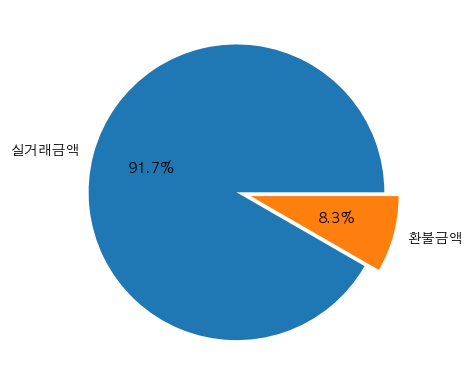

In [34]:
# 실거래금액과 환불금액의 비율 표

matplotlib.rcParams['font.family'] = 'AppleGothic' 

# total = 실거래금액, refund = 환불금액
value = [total, abs(refund)]
label = ['실거래금액','환불금액']
explode = [0.05] * 2

plt.pie(value, labels=label, autopct="%.1f%%", explode=explode)

### 실거래금액에서 환불금액이 차지하는 비율은 약 8.3% 이다.

In [54]:
# 실거래금액 월별 분석

### 거래일자에서 오전, 오후, 빈칸, . 삭제
dates = eda_pj['거래일자'].str.replace("오전", "") 
dates = dates.str.replace("오후", "")
dates = dates.str.replace(" ", "")
dates = dates.str.replace(".", " ")

### 거래일자에서 월 만 추출하여 month에 저장
month = []
for i in range(len(dates)):
    redate = datetime.datetime.strptime(dates[i], '%Y %m %d %H:%M:%S')
    redate = redate.strftime('%m')
    month.append(redate)
eda_pj['월'] = month
eda_pj


,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-,12
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-,12
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-,12
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-,12
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-,01
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-,01
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-,01
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-,01


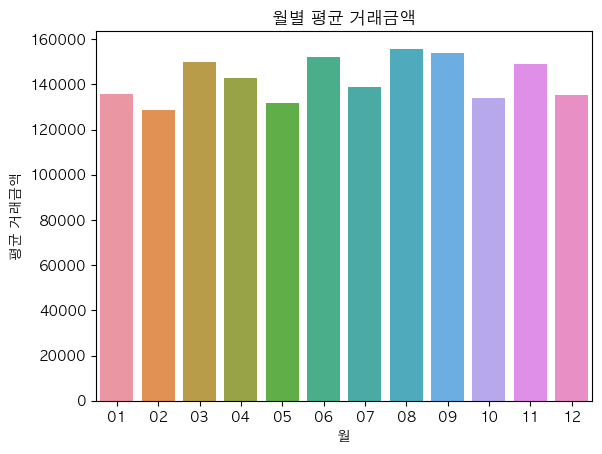

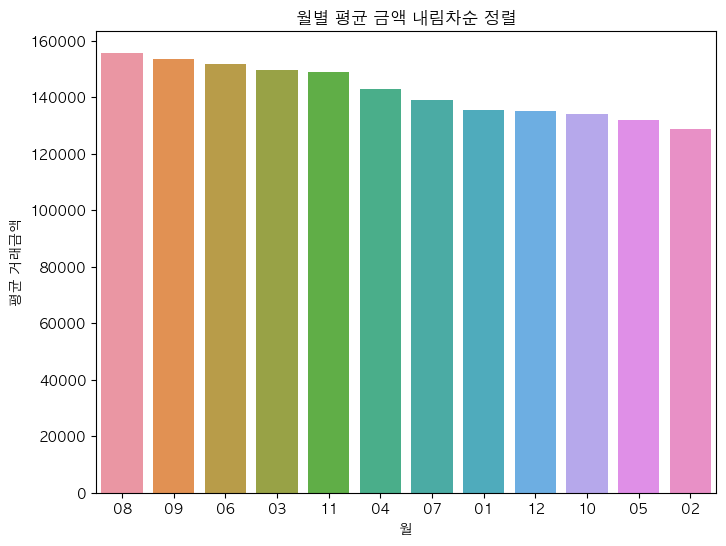

In [36]:
### eda_pj Dataframe에서 실거래금액 column만 빼내서 price_m Dataframe에 저장
price = eda_pj['실거래금액']

price_m = pd.DataFrame({
    '거래금액': price,
    'month': month
})

### price_m에서 월별로 그룹화 해서 거래금액 평균을 m_price로 저장
m_price = price_m.groupby('month').mean()

### 각 월별 평균 거래금액을 그래프화
sns.barplot(x=m_price.index, y=m_price['거래금액'], data=m_price)
plt.title("월별 평균 거래금액")
plt.xlabel("월")
plt.ylabel("평균 거래금액")
plt.show()


### 각 월별 평균 거래금액을 내림차순으로 정렬하여 그래프화
m_price = m_price.pivot_table(index=m_price.index, values='거래금액').sort_values(by='거래금액', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=m_price, x=m_price.index, y='거래금액')
plt.title("월별 평균 금액 내림차순 정렬")
plt.xlabel("월")
plt.ylabel("평균 거래금액")
plt.show()


### 2022년 월별 평균 금액은 8월이 가장 높으며 2월이 가장 낮다.
- 8, 9, 6, 3, 11월이 높은것으로 봐서 학기초 혹은 학기말에 공부를 시작하려는 사람이 많은 것으로 예상한다.

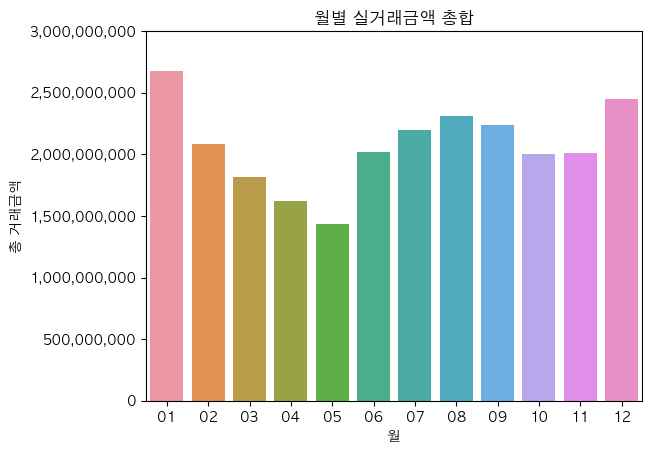

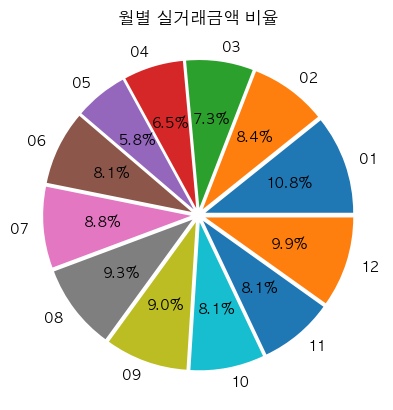

In [37]:
# 월별 총 매출 비교

# 월별 총 매출을 새로운 Dataframe에 저장
ms_price = pd.DataFrame(eda_pj['실거래금액'])
ms_price['월'] = month
ms_price = ms_price[ms_price['실거래금액'] > 0] # 실거래금액이 0 초과인 데이터만 필터링
price_ms = ms_price.groupby('월')['실거래금액'].sum().reset_index() # 월별 실거래금액 총합을 price_ms에 저장

# 월별 실거래금액 총합을 bar그래프로 시각화
sns.barplot(data=price_ms, x='월', y='실거래금액')
plt.title("월별 실거래금액 총합")
plt.xlabel("월")
plt.ylabel("총 거래금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 월별 실거래금액 총합을 pie그래프로 시각화
value = price_ms['실거래금액']
label = price_ms['월']
explode = [0.05] * 12

plt.title("월별 실거래금액 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

### 1월과 12월에 월별 총매출이 가장 높았다.
- 연말과 연초에 올해는 뭔가 해보겠다는 마음으로 시작하는 사람이 많은걸까?
- 5월이 가장 낮은 이유는 무엇일까?

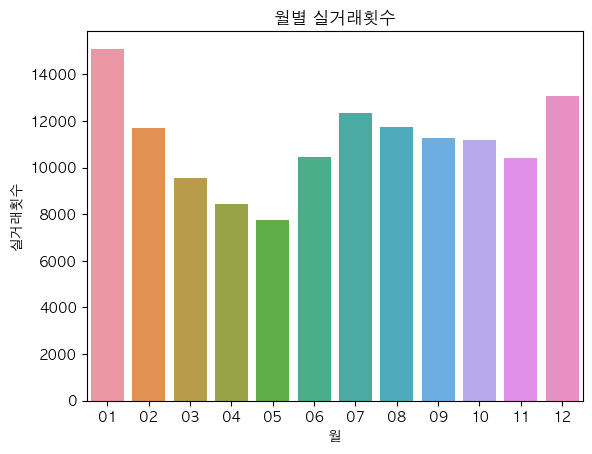

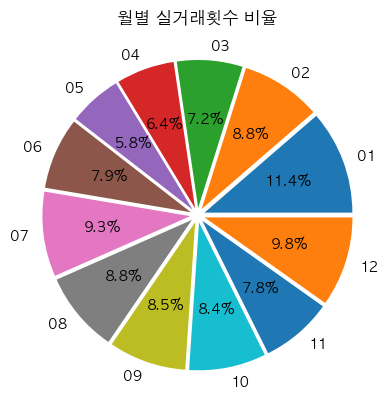

In [38]:
# 월별 실거래 건수 비교

mc_price = pd.DataFrame(eda_pj['실거래금액'])
mc_price['월'] = month
mc_price = mc_price[mc_price['실거래금액'] > 0] # 실거래금액이 0 초과인 데이터만 필터링
# 월별로 실거래금액의 row갯수를 count해서 Dataframe 생성
m_price_c = mc_price.groupby(['월'])['실거래금액'].count().reset_index(name='카운트')

# 월별 실거래횟수를 bar그래프로 시각화
sns.barplot(data=m_price_c, x='월', y='카운트')
plt.title("월별 실거래횟수")
plt.xlabel("월")
plt.ylabel("실거래횟수")

plt.show()
 
# 월별 실거래횟수를 pie그래프로 시각화
value = m_price_c['카운트']
label = m_price_c['월']
explode = [0.05] * 12

plt.title("월별 실거래횟수 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

/var/folders/gb/s4hx05y95mvdsf9ymsgq17740000gn/T/ipykernel_1717/3919780533.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{int(y/10000):,}만원" for y in ax1.get_yticks()])


<Figure size 640x480 with 0 Axes>

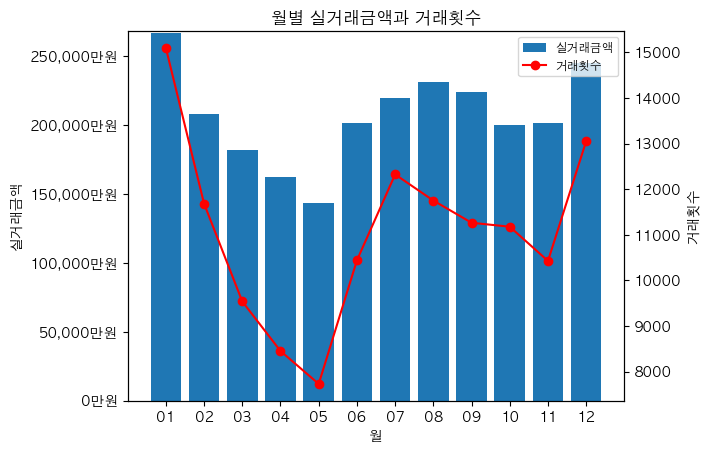

In [39]:
# 월별 실거래금액과 거래횟수 그래프

# 그래프 x축 데이터
x = price_ms['월']

# 그래프 y축 데이터
y1 = price_ms['실거래금액']
y1_max = max(y1)
y2 = m_price_c['카운트']

# 위치 조정
plt.subplots_adjust(bottom=0.2, left=0.1)

# 첫 번째 y축(ax1)은 막대 그래프로 표현
fig, ax1 = plt.subplots()
ax1.bar(x, y1, label='실거래금액')
ax1.set_xlabel('월')
ax1.set_ylabel('실거래금액')

# y축(ax1) 범위 자동 조절
ax1.set_ylim([0, y1_max+10000000])

# y축(ax2)은 선 그래프로 표현
ax2 = ax1.twinx()
ax2.plot(x, y2, '-o', color='red', label='거래횟수')
ax2.set_ylabel('거래횟수')

# y축 tick format 변경
ax1.set_yticklabels([f"{int(y/10000):,}만원" for y in ax1.get_yticks()])

# 범례 표시
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
plt.legend(handles, labels, loc='best', fontsize='small')

# 그래프 제목
plt.title('월별 실거래금액과 거래횟수')

plt.show()


In [40]:
# 두 데이터프레임에서 월을 삭제후 병합하여 데이터프레임 msc 생성
msc = pd.concat([m_price_c.drop('월', axis=1), price_ms.drop('월', axis=1)], axis=1)

# 상관계수(Correlation Coefficient)를 구하여 출력
corr = msc.corr().iloc[0,1]
print(f"상관계수: {corr:.2f}")


상관계수: 0.97


### 월별 실거래금액과 거래횟수의 상관관계는 0.97로 양의 상관관계가 확실하다.
- 3, 4, 5월은 거래횟수에 비해 실거래금액이 높다. 이유는?

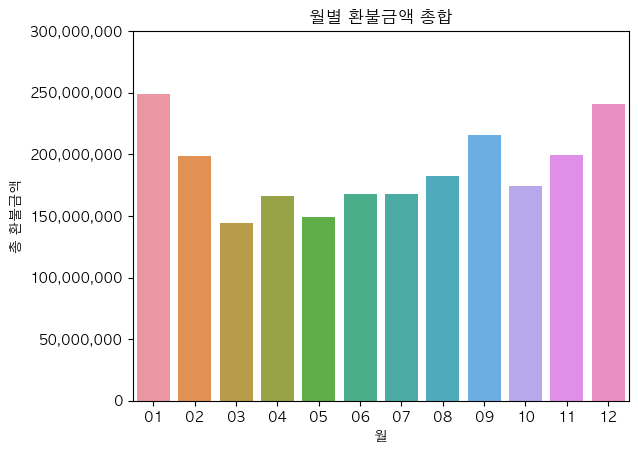

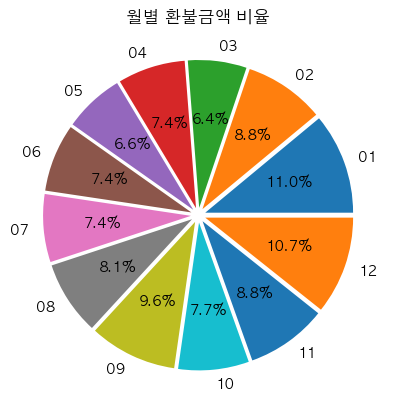

In [41]:
# 월별 환불금액 비교

# 월별 환불금액 Dataframe 생성
m_refund = pd.DataFrame(eda_pj['환불금액'])
m_refund['월'] = month
# 환불금액에 "-" 문자열 제거
m_refund['환불금액'] = m_refund['환불금액'].str.replace("-", "")
# 환불금액에 값이 없는 row 제거
m_refund.drop(m_refund[m_refund['환불금액'] == ""].index, inplace=True)
# 환불금액의 Dtype을 int로 변경
m_refund['환불금액'] = m_refund['환불금액'].astype(int)
# 환불금액을 월별로 합산
refund_m = m_refund.groupby('월')['환불금액'].sum().reset_index()

# 월별 실거래금액 총합을 bar그래프로 시각화
sns.barplot(data=refund_m, x='월', y='환불금액')
plt.title("월별 환불금액 총합")
plt.xlabel("월")
plt.ylabel("총 환불금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 월별 환불금액 총합을 pie그래프로 시각화
value = refund_m['환불금액']
label = refund_m['월']
explode = [0.05] * 12

plt.title("월별 환불금액 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

### 월별 환불 금액도 1월, 12월에 가장 많았다.
- 거래금액과 환불금액이 똑같이 1, 12월에 가장 많았던 이유는 무엇일까?

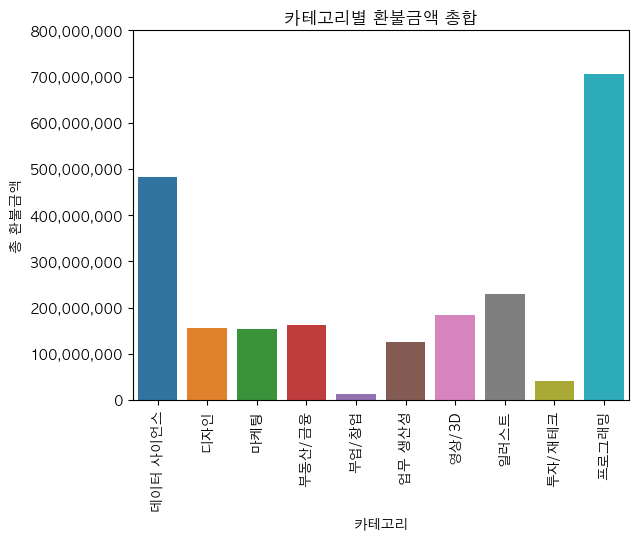

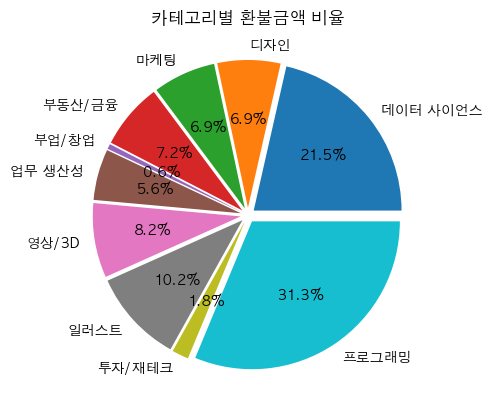

In [42]:
# 카테고리별 환불금액

# 월별 총 환불금액을 새로운 Dataframe에 저장
c_refund = pd.DataFrame(eda_pj[['환불금액', '카테고리']])
# 환불금액에 "-" 문자열 제거
c_refund['환불금액'] = c_refund['환불금액'].str.replace("-", "")
# 환불금액에 값이 없는 row 제거
c_refund.drop(c_refund[c_refund['환불금액'] == ""].index, inplace=True)
# 환불금액의 Dtype을 int로 변경
c_refund['환불금액'] = c_refund['환불금액'].astype(int)

# 월별 실거래금액 총합을 price_ms에 저장
refund_c = c_refund.groupby('카테고리')['환불금액'].sum().reset_index() 

# 월별 실거래금액 총합을 bar그래프로 시각화
sns.barplot(data=refund_c, x='카테고리', y='환불금액')
plt.title("카테고리별 환불금액 총합")
plt.xlabel("카테고리")
plt.xticks(rotation=90)
plt.ylabel("총 환불금액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()
 
# 월별 실거래금액 총합을 pie그래프로 시각화
value = refund_c['환불금액']
label = refund_c['카테고리']
explode = [0.05] * 10

plt.title("카테고리별 환불금액 비율")
plt.pie(value, labels=label, explode=explode, autopct='%.1f%%')

plt.show()

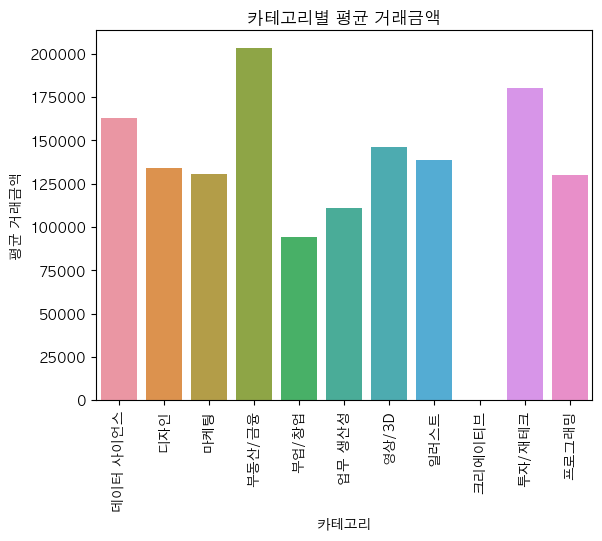

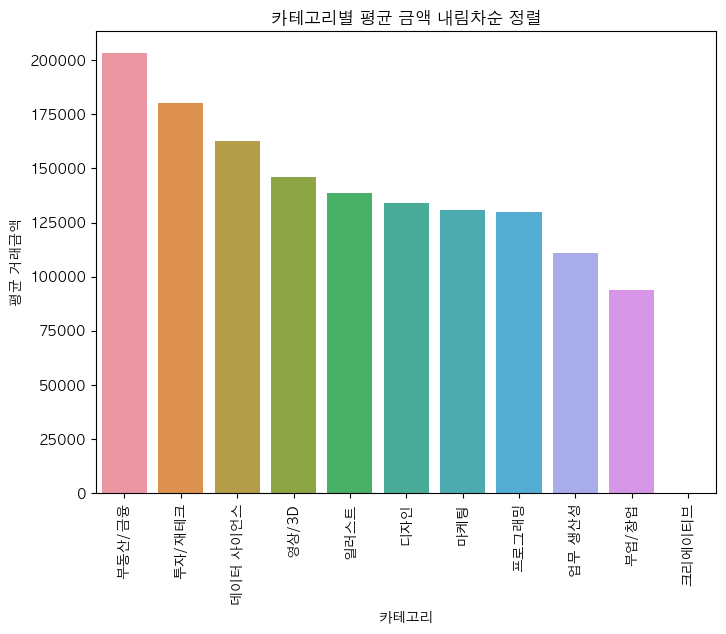

In [43]:

### 카테고리와 실거래 금액을 추출하여 Dataframe 생성
price_c = pd.DataFrame({
    '카테고리': eda_pj['카테고리'],
    '거래금액': eda_pj['실거래금액']    
})

### 카테고리 별 그룹화 하여 평균 거래금액을 c_price에 저장
c_price = price_c.groupby(by='카테고리').mean()
c_price

### 각 카테고리별 평균 거래금액을 그래프화
sns.barplot(x=c_price.index, y=c_price['거래금액'], data=c_price)
plt.xticks(rotation=90)
plt.title("카테고리별 평균 거래금액")
plt.xlabel("카테고리")
plt.ylabel("평균 거래금액")
plt.show()


### 각 별 평균 거래금액을 내림차순으로 정렬하여 그래프화
c_price = c_price.pivot_table(index=c_price.index, values='거래금액').sort_values(by='거래금액', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=c_price, x=c_price.index, y='거래금액')
plt.xticks(rotation=90)
plt.title("카테고리별 평균 금액 내림차순 정렬")
plt.xlabel("카테고리")
plt.ylabel("평균 거래금액")
plt.show()


### 부동산/금융,투자/재테크.데이터사이언스 순으로 강의 판매 금액이 많다 .
- 실제 판매 건수와 비교해서 부동산/금융의 판매건수를 확인하자.

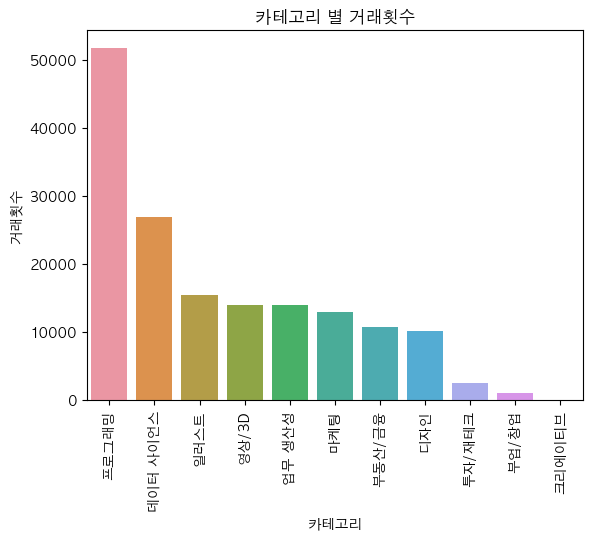

In [44]:
# 카테고리별 거래횟수 
count_c = eda_pj.groupby('카테고리').size().reset_index(name='카운트')

# 거래횟수 내림차순으로 정렬
c_count = count_c.sort_values('카운트', ascending=False)

# 카테고리 별 거래횟수 시각화
sns.barplot(x='카테고리', y='카운트', data=c_count)
plt.xticks(rotation=90)
plt.title("카테고리 별 거래횟수")
plt.xlabel("카테고리")
plt.ylabel("거래횟수")
plt.show()


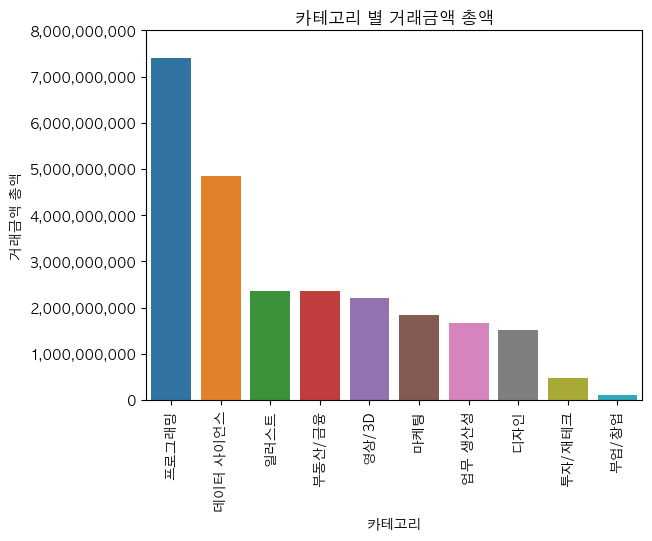

In [45]:
# 카테고리별 총 거래금액

# 카테고리 실거래금액 Dataframe 생성
price_s = eda_pj[['카테고리', '실거래금액']]

# 실거래금액 값이 0 초과인것만 선택
s_price = price_s[price_s['실거래금액'] > 0]

# 카테고리별 실거래금액의 총합을 계산
s_price = s_price.groupby('카테고리')['실거래금액'].sum().reset_index()

# 실거래금액의 내림차순으로 정령
s_price = s_price.sort_values('실거래금액', ascending=False)

# 카테고리 별 실거래금액 총합 시각화
sns.barplot(x='카테고리', y='실거래금액', data=s_price)
plt.xticks(rotation=90)
plt.title("카테고리 별 거래금액 총액")
plt.xlabel("카테고리")
plt.ylabel("거래금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()


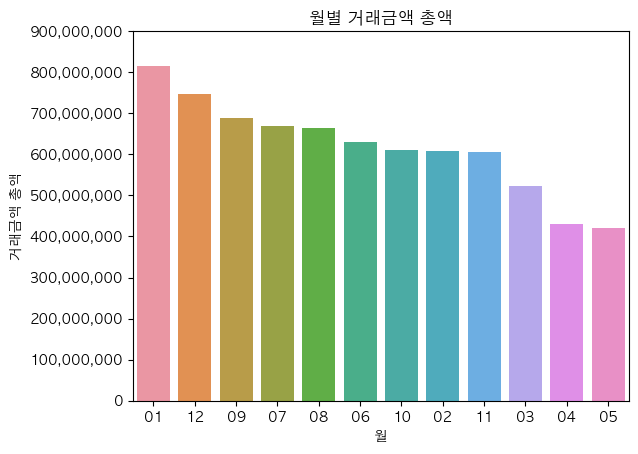

    월       거래금액
0  01  814249750
    월       거래금액
4  05  421462400


In [83]:
# 카테고리중 프그래밍만 비교

# 카테고리 값이 프로그래밍인 값만 뽑아서 cat_pro Dataframe에 저장
cat_pro = pd.DataFrame(eda_pj[eda_pj['카테고리'] == '프로그래밍'])

# 환불금액과 거래금액의 값중 '-'를 '0'으로 변경
cat_pro['환불금액'] = cat_pro['환불금액'].replace('-', '0')
cat_pro['거래금액'] = cat_pro['거래금액'].replace('-', '0')
# 환불금액과 거래금액의 dtype을 int로 변경
cat_pro['환불금액'] = cat_pro['환불금액'].astype(int)
cat_pro['거래금액'] = cat_pro['거래금액'].astype(int)

# 월별 거래금액의 합으로 그룹화
m_pro = cat_pro.groupby('월')['거래금액'].sum().reset_index()

# 거래금액의 내림차순으로 정령
m_pro = m_pro.sort_values('거래금액', ascending=False)

# 월별 거래금액 총합 시각화
sns.barplot(x='월', y='거래금액', data=m_pro)
plt.title("월별 거래금액 총액")
plt.xlabel("월")
plt.ylabel("거래금액 총액")
plt.yticks(plt.yticks()[0], [f"{int(y_value):,}" for y_value in plt.yticks()[0]])

plt.show()

print(m_pro.head(1))
print(m_pro.tail(1))
